<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Nuevos/MiguelAMoreno_Proyecto3_MN20221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto3: Miguel A Moreno

El problema para el proyecto # 3 se obtuvo del siguiente video:
https://www.youtube.com/watch?v=RwnQYzIOwAc

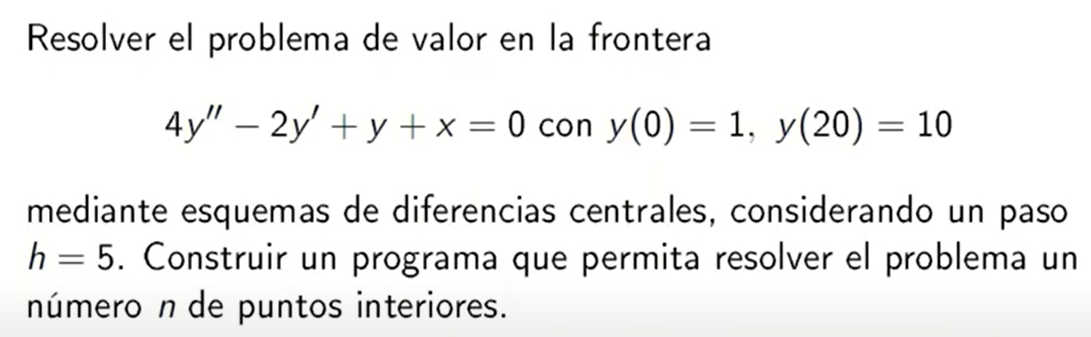

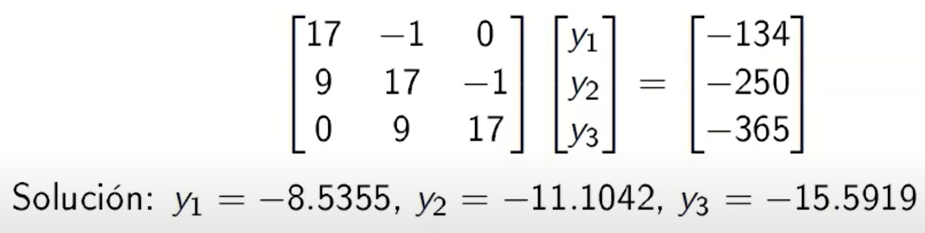


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy import optimize

class Sol_EDO:
  def __init__(self, n=3, H = (4,-2,1)):
    '''
      

      Parameters
      ----------
      n : TYPE -> Variable.
          DESCRIPTION: Número de puntos interiores deseado.
      H : TYPE -> Tuple.
          DESCRIPTION: Tuple con los parámetros de la EDO.  
        

      Returns
      -------
      None.

      '''
    self.n = n 
    self.H = H
    
    print("\nInicio solución con número de puntos interiores =", n, "y parametros iniciales:", H)
    return

  def Diferencias_Finitas(self,color,label, H = (4,-2,1)):
    '''
    

    Parameters
    ----------
    H : TYPE -> Tuple.
        DESCRIPTION: Tuple con los parámetros de la EDO.
    color : TYPE -> Str.
        DESCRIPTION: Color deseado para la gráfica.
    label : TYPE -> STr.
        DESCRIPTION: Título deseado para la leyenda.


    Returns
    -------
    Puntos_y : TYPE -> Lista.
        DESCRIPTION: Lista con los datos en Y de la solución de la EDO.
    Puntos_x : TYPE -> Lista.
        DESCRIPTION: Lista con los datos en X de la solución de la EDO.

    '''
    n = int(self.n) 
    Z = H
    
    #Parámetros entregados por el usuario.
    E = Z[0]
    F = Z[1]
    G = Z[2]
    
    #Puntos frontera.
    x0 = 0
    xf = 20
    y0 = 1
    yf = 10
    
    #Para n = 3 -> h = 5.
    h = (xf-x0)/(n+1) #Determina el valor de h mediante el número de puntos interiores deseado.
    x = np.linspace(x0,xf,n+2) #n puntos interiores y sumo 2 (n+2) puntos extremos, los puntos frontera. 
    b = np.zeros(n) #Inicializamos el vector b como un vector de ceros.
    A = np.eye(n)*(G*h**2-2*E) #.eye() permite crear la matriz identidad de tamaño nxn; en la diagonal tendrá una cantidad de datos (h**2-8)
    
    #Completamos la matriz A (fila x columna):
    for k in range(0,n-1): 
        A[k][k+1]=E+(F*h)/2 #Sobre la diagonal tiene el valor -h+4, corresponde a yi+1 en la ecuación general del problema.
        A[k+1][k]=E-(F*h)/2 #Bajo la diagonal tiene el valor h+4, coeficiente que acompaña a yi-1 en la ecuación general del problema.
        b[k]=-h**2*x[k+1] #Calculamos algunos valores de b (los interiores); como el ciclo inicia con x0 usamos k+1 para obtener x1.
        
    #Construcción del vector b:    
    b[0]=-h**2*x[1]-y0*(E-(5*F)/2) #Valor del vector b en la componente 0, x[1] será el segundo valor despues de x0.
    b[n-1]=-h**2*x[n]-yf*(E+(5*F)/2) #Valor del vector b en la posición n-1, x[n] será el último valor de la variable x antes de xf.
    
    #Solución de la matriz:
    y = np.linalg.inv(A).dot(b) #.linalg.inv() -> Inversa de "A", .dot() convierte "b" en un vector columna.
    y = np.insert(y,0,y0) #Agragramos el valor inicial de y con la función .insert(),(en y, en la posición 0, agregue el valor y0).
    y = np.insert(y,len(y),yf) #Agregamos el valor final de y con la función .insert(),(en y, en la posición final, agregue el valor yf).
    
    Puntos_y = []
    self.Datos_y = Puntos_y #Lista con los puntos solución y.
    Puntos_x = []
    self.Datos_x = Puntos_x #Lista con los puntos solución x.
    
    for k in range(len(y)):
        Puntos_y.append(y[k])
        Puntos_x.append(x[k])
        #print("y(",round(x[k], 4),")=",round(y[k], 4))
     
    #plt.figure(1)    
    #plt.plot(x,y, "-ro", color=color,label=label)    
    #plt.grid("on")
    #plt.legend()
    #plt.xlabel("Eje X")
    #plt.ylabel("Eje Y")
    #plt.title("Solución método Diferencias finitas")
    #plt.show()

    return Puntos_y

  def Metodo_Disparo(self, U):
    '''
    

    Parameters
    ----------

    U : TYPE -> Int.
        DESCRIPTION: Valor de la segunda condición inicial (Valor de la derivada).

    Returns
    -------
    
    Error entre la solución obtenida con una segunda condición inicial dada y el punto frontera Y(20)=10.

    '''
      
    y0 = self.Datos_y[0] #Punto condición inicial (primer punto frontera).
    z0 = [y0, U] #Lista con condiciones iniciales. 
  
    S_modelo = odeint(EDO, z0, self.Datos_x, self.H) #Solucion EDO
    self.S_modelo = S_modelo
    
    return S_modelo[-1,0]-10 #Error entre la solución obtenida con una segunda condición inicial dada y el punto frontera Y(20)=10.


  def Newton(self, L): #Método para obtener el valor de "x" más acertado para el punto frontera.
    '''
    

    Parameters
    ----------

    L : TYPE -> Int.
        DESCRIPTION: Valor inicial de busqueda para la segunda condición inicial (Valor de la derivada).

    Returns
    -------
    
    Valor de la segunda condición inicial que mejor se ajusta el segundo punto frontera

    '''  
    respuesta = optimize.newton(self.Metodo_Disparo, L)
    print("\nEl valor de la segunda condición inicial que mejor se ajusta el segundo punto frontera es:", respuesta)
    
    return respuesta

  def Grafica(self):
    '''
    Gráfica y compara ambas soluciónes (Método Diferencias Finitas y Método del disparo)

    Returns
    -------
    None.

    '''
      
    plt.figure(2)
    plt.title("Método Diferencias Finitas vs Método del Disparo")
    plt.plot(self.Datos_x, self.S_modelo[:,0], "-ro", color="purple", label="Método del disparo")
    plt.plot(self.Datos_x, self.Datos_y, "-ro", color="red", label="Método Diferencias Finitas")  
    plt.legend()    
    plt.grid("on")
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.show()
    
    print("Donde Y(20)=",self.S_modelo[-1,0], "con la nueva condición inicial.")

  def F_error_edo(self, V, D_Y):

    Sol_Metodo = self.Diferencias_Finitas("orange","Solución parametros nuevos", V) #Lista de soluciones en Y de la ecuación.

    Suma=0
    NN = len(Sol_Metodo)
    for q in range(NN):
        ei = (Sol_Metodo[q]-D_Y[q])**2
        Suma = Suma + ei
    error = Suma/NN #Suma error cuadratico medio.
    
    return error
  
  def Aprox_Par(self, D_Y, Q):
   
    Z = self.H
    
    #Parámetros.
    E = Z[0]
    F = Z[1]
    G = Z[2]

    X0 = [Q[0], Q[1], Q[2]] #Vector inicial de busqueda
    res = minimize(self.F_error_edo, X0, args=(D_Y), method='Nelder-Mead'),# method='Nelder-Mead')
    res[0].x
    print("Valores A,B,C: ",res[0].x)
    print("Error minimo: ",res[0].fun)
    
    return res[0].x

def EDO(Z, x, A=4, B=-2, C=1): 
    '''
    
    Parameters
    ----------
    Z[z0, z1] : TYPE -> Función vectorial.
                DESCRIPTION: Función vectorial dependiente de x.
                             Z0 = Y Variable dependiente Y)
                             Z1 = d_Y (Derivara de Y)
    x : TYPE -> Variable.
        DESCRIPTION: Variable independiente.
    A : DESCRIPTION. Parametro 1.
    B : DESCRIPTION. Parametro 2.
    C : DESCRIPTION. Parametro 3.
    
    Returns
    -------
    Dz -> Función vectorial dependiente de las variables [z0, z1] siendo estas dependientes de "x" y "y".

    '''
    
    z0,z1 = Z
    
    D_z0 = z1
    D_z1 = (-B*z1-C*z0-x)/A
    Dz = np.array([D_z0, D_z1])
    
    return Dz



Inicio solución con número de puntos interiores = 1000 y parametros iniciales: (4, -2, 1)

El valor de la segunda condición inicial que mejor se ajusta el segundo punto frontera es: 1.2393165890598048


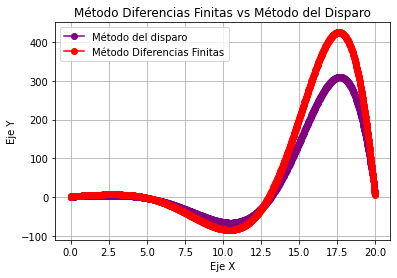

Donde Y(20)= 10.000000000003164 con la nueva condición inicial.


In [ ]:
#Punto 1):
EDO1 = Sol_EDO(1000)
EDO1.Diferencias_Finitas("red","Solución parametros originales")

L = 1 #Condición inicial para la segunda derivada (Se asume una para empezar la busqueda).

M = EDO1.Newton(L) #Nueva condición inicial   
EDO1.Metodo_Disparo(M)
EDO1.Grafica()

#Guardaremos los valores de las soluciones:

#Método diferencias finitas.
D_X = EDO1.Datos_x
D_Y = EDO1.Datos_y 

#Método del disparo.
D_Smodelo = EDO1.S_modelo

In [ ]:
#Punto 2):

#Parámetros iniciales.
Q = (3.9, -1.9, 0.9)

EDO2 = Sol_EDO(1000, Q) #Creamos otro objeto con nuevos parametros.
EDO2.Diferencias_Finitas("orange","Solución parametros nuevos", Q)
error = EDO2.F_error_edo(Q, D_Y)

print("El error cuadrático medio con los parámetros iniciales será:", error)

EDO2.Aprox_Par(D_Y, Q)


Inicio solución con número de puntos interiores = 1000 y parametros iniciales: (3.9, -1.9, 0.9)
El error cuadrático medio con los parámetros iniciales será: 2668.9650617295943
Valores A,B,C:  [ 4. -2.  1.]
Error minimo:  3.4784484330099655e-20


array([ 4., -2.,  1.])